In [1]:
!pip install -e ..

Obtaining file:///export/home/figs/vdesouza/work/Holography-1022/astrohack
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for astrohack (pyproject.toml) ... done
  Created wheel for astrohack: filename=astrohack-0.0.1-py3-none-any.whl size=1059 sha256=06aa67deff29d353eb3509beba5c19f1a9969629944b85bab9cc273444b0ad19
  Stored in directory: /tmp/pip-ephem-wheel-cache-bhhqfew5/wheels/93/bb/ed/46bdf801cce81c3aea69f1f4af83e386e0f89149047ab78ae0
Successfully built astrohack
  Attempting uninstall: astrohack
    Found existing installation: astrohack 0.0.1
    Uninstalling astrohack-0.0.1:
      Successfully uninstalled astrohack-0.0.1


In [2]:
from astrohack._utils._phase_fitting import _correct_phase, phase_fitting
from astrohack._classes.telescope import Telescope
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Simple Function to allow us to plot out phase images
from mpl_toolkits.axes_grid1 import make_axes_locatable
def plot_phase_image(image):
    fig, ax = plt.subplots(1, 1, figsize=[10, 5])
    im = ax.imshow(image.T, cmap="viridis", interpolation="nearest")
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, label="Z Scale", cax=cax)

In [32]:
# setting up a few telescope related parameters
npix = 256
dummyimg = np.zeros((npix,npix))
ampimg = dummyimg +1. #(np.random.rand(npix,npix)-0.5)*10.0
telecope = Telescope('VLA')
cellxy = 0.046875 # meters
wavelength = 0.34 # meters
enable = False
disable = True

In [33]:
# Setting the perturbations for the phase
phase_off = 3
x_pnt_off = np.pi/8 -2
y_pnt_off = np.pi/4
x_foc_off = np.pi/3
y_foc_off = 0.5
z_foc_off = np.pi/3 +1
x_til_off = 0.1
y_til_off = -0.2
x_cas_off = 0.3
y_cas_off = -0.4
parameters = [phase_off, x_pnt_off, y_pnt_off, x_foc_off, y_foc_off, z_foc_off, x_til_off, y_til_off, x_cas_off, y_cas_off]

In [34]:
%%time
# Here we create a model phase image from the phase perturbations added above
corrected, model = _correct_phase(dummyimg, cellxy, parameters, magnification, focal_length, phase_slope)

CPU times: user 608 ms, sys: 0 ns, total: 608 ms
Wall time: 610 ms


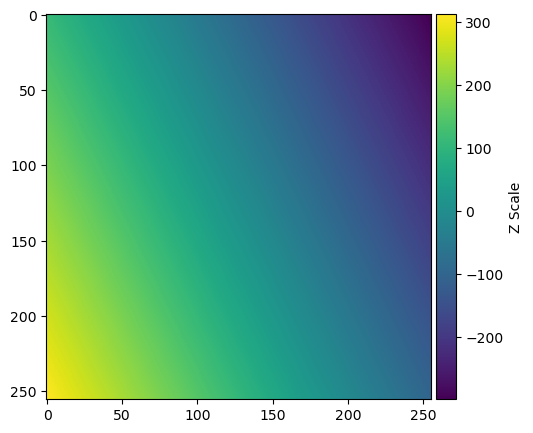

In [35]:
# here is the model we are using
plot_phase_image(model)

In [36]:
%%time
# here we do the actual phase fitting
fitting = phase_fitting(wavelength, focal_length, rmin, rmax, cellxy, ampimg, model, enable, enable, enable,
                       enable, enable, magnification, secondary_z_offset, phase_slope)

CPU times: user 2.33 s, sys: 341 ms, total: 2.67 s
Wall time: 2.25 s


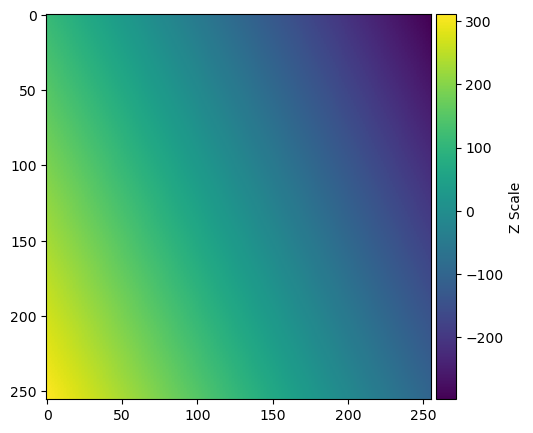

In [37]:
# here is the model derived from phase fitting
plot_phase_image(fitting[3])

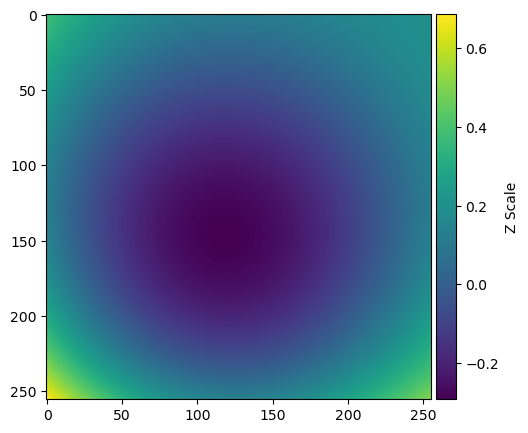

In [38]:
# here are the residuals after the phase fitting
plot_phase_image(fitting[2])

In [31]:
fitting[0]

array([ 9.07508865e-03, -1.07020551e-03,  1.63227535e-03, -1.12044112e-01,
       -1.07642768e-01,  3.47468023e+00,  7.78315403e-08,  3.01561316e-07,
        3.38018236e+03, -1.63638777e+03])